In [1]:
import pandas as pd
import numpy as np
import os

# seaborn可视化
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="notebook", style="darkgrid", 
        palette="deep", font="sans-serif", 
        font_scale=1, color_codes=True)

# 忽略警告
import warnings
warnings.filterwarnings("ignore")

# Read the dataset

In [3]:
#setup the maximum display of columns to see what feature we may wanna use
pd.set_option('display.max_columns', None)

In [34]:
df = pd.read_csv('final_data.csv')
df.head(10)

,tripduration,starttime,stoptime,startstationid,startstationname,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,endstationlongitude,bikeid,usertype,gender,start_month,start_day,start_hour,start_minute,start_second,stop_month,stop_day,stop_hour,stop_minute,stop_second,temp,feelslike,humidity,snowdepth,windspeed,visibility,start_weekday,start_quarter,age,distance
0,325.0,2016-08-17 09:47:41,2016-08-17 09:53:06,441.0,E 52 St & 2 Ave,40.756014,-73.967416,3142.0,1 Ave & E 62 St,40.761227,-73.960940,22164.0,1.0,2.0,8,17,9,47,41,8,17,9,53,6,25.9,25.9,71.16,0.0,9.8,14.8,2,3,72.0,796.362065
1,746.0,2016-06-03 21:01:32,2016-06-03 21:13:59,393.0,E 5 St & Avenue C,40.722992,-73.979955,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14922.0,1.0,2.0,6,3,21,1,32,6,3,21,13,59,19.7,19.7,80.21,0.0,8.3,14.2,4,2,29.0,1508.464328
2,749.0,2016-07-11 18:15:39,2016-07-11 18:28:08,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,418.0,Front St & Gold St,40.702240,-73.982578,21479.0,1.0,2.0,7,11,18,15,39,7,11,18,28,8,26.9,26.9,43.36,0.0,9.1,16.0,0,3,46.0,1772.886614
3,139.0,2016-05-31 08:05:46,2016-05-31 08:08:06,315.0,South St & Gouverneur Ln,40.703554,-74.006702,259.0,South St & Whitehall St,40.701221,-74.012342,17057.0,1.0,1.0,5,31,8,5,46,5,31,8,8,6,23.1,23.1,76.87,0.0,8.1,12.9,1,2,42.0,542.474970
4,532.0,2016-06-17 19:56:12,2016-06-17 20:05:05,3117.0,Franklin St & Dupont St,40.735640,-73.958660,3092.0,Berry St & N 8 St,40.719009,-73.958525,23843.0,1.0,1.0,6,17,19,56,12,6,17,20,5,5,21.8,21.8,35.94,0.0,9.6,16.0,4,2,31.0,1846.829562
5,1379.0,2016-04-19 21:25:34,2016-04-19 21:48:34,150.0,E 2 St & Avenue C,40.720874,-73.980858,459.0,W 20 St & 11 Ave,40.746745,-74.007756,14978.0,1.0,1.0,4,19,21,25,34,4,19,21,48,34,17.3,17.3,18.13,0.0,22.8,16.0,1,2,35.0,3662.885700
6,428.0,2016-04-18 19:52:07,2016-04-18 19:59:16,225.0,W 14 St & The High Line,40.741951,-74.008030,482.0,W 15 St & 7 Ave,40.739355,-73.999318,16701.0,1.0,2.0,4,18,19,52,7,4,18,19,59,16,21.8,21.8,19.82,0.0,17.4,16.0,0,2,32.0,790.328353
7,104.0,2016-12-03 11:55:25,2016-12-03 11:57:09,253.0,W 13 St & 5 Ave,40.735439,-73.994539,280.0,E 10 St & 5 Ave,40.733320,-73.995101,26357.0,1.0,1.0,12,3,11,55,25,12,3,11,57,9,7.3,3.6,45.17,0.0,24.5,16.0,5,4,62.0,240.123630
8,784.0,2016-01-05 12:33:53,2016-01-05 12:46:58,279.0,Peck Slip & Front St,40.707873,-74.001670,400.0,Pitt St & Stanton St,40.719261,-73.981780,21366.0,1.0,1.0,1,5,12,33,53,1,5,12,46,58,-5.4,-11.3,31.37,0.0,16.0,16.0,1,1,73.0,2103.282897
9,1294.0,2016-09-04 12:50:48,2016-09-04 13:12:22,471.0,Grand St & Havemeyer St,40.712868,-73.956981,471.0,Grand St & Havemeyer St,40.712868,-73.956981,26938.0,1.0,1.0,9,4,12,50,48,9,4,13,12,22,23.5,23.5,50.06,0.0,15.0,16.0,6,3,31.0,0.000000


In [35]:
# change the starting time and ending time to datetime
# adding lib to track the time
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])
df.dtypes

tripduration                    float64
starttime                datetime64[ns]
stoptime                 datetime64[ns]
startstationid                  float64
startstationname                 object
startstationlatitude            float64
startstationlongitude           float64
endstationid                    float64
endstationname                   object
endstationlatitude              float64
endstationlongitude             float64
bikeid                          float64
usertype                        float64
gender                          float64
start_month                       int64
start_day                         int64
start_hour                        int64
start_minute                      int64
start_second                      int64
stop_month                        int64
stop_day                          int64
stop_hour                         int64
stop_minute                       int64
stop_second                       int64
temp                            float64


In [14]:
df.set_index('starttime', inplace=True)

# Aggregate the features we need

In [21]:
# resample the data to daily
daily = df.resample('D').agg({
    'start_weekday': 'first',  # 假设每天的星期信息是一致的，取第一个即可
    'bikeid': 'size'  # 计算每天的使用次数
}).rename(columns={'bikeid': 'usage_count'})
daily.head()

,start_weekday,usage_count
starttime,,
2016-01-01,4.0,8508
2016-01-02,5.0,12134
2016-01-03,6.0,13368
2016-01-04,0.0,18951
2016-01-05,1.0,17571


# Visulize

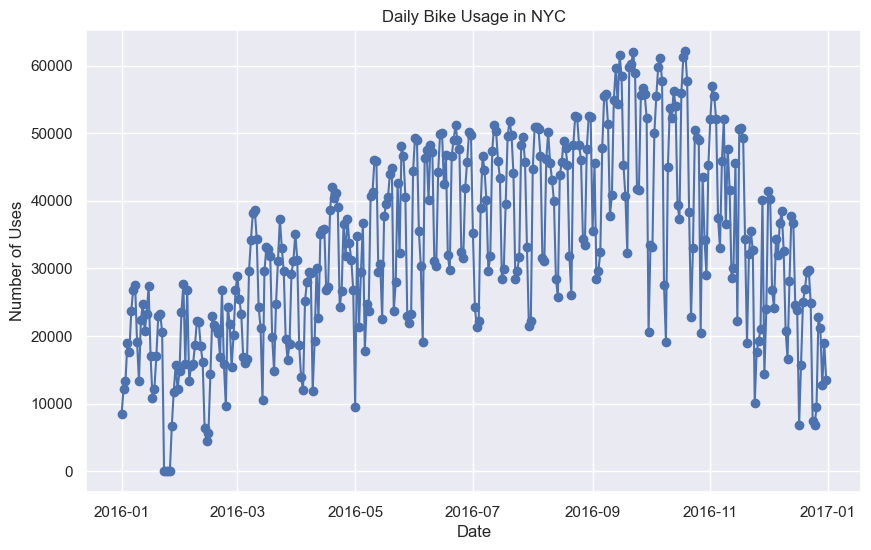

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(daily['starttime'], daily['usage_count'], marker='o', linestyle='-')
plt.title('Daily Bike Usage in NYC')
plt.xlabel('Date')
plt.ylabel('Number of Uses')
plt.grid(True)
plt.show()


## only first month

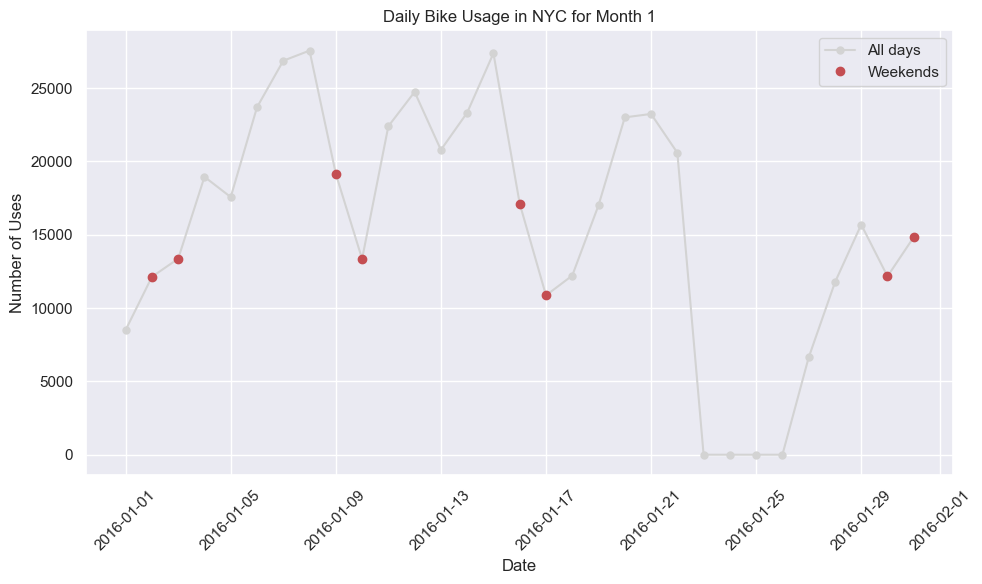

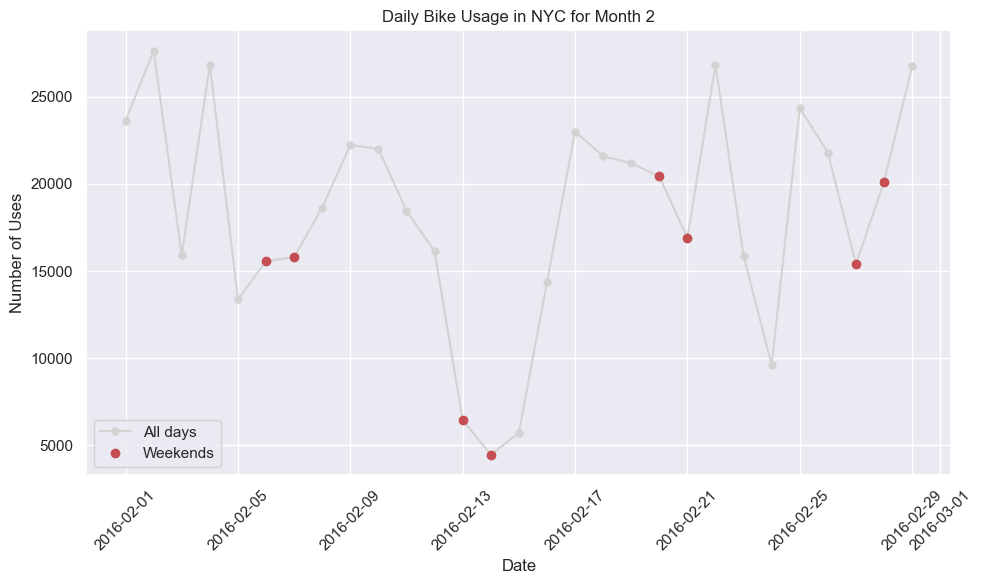

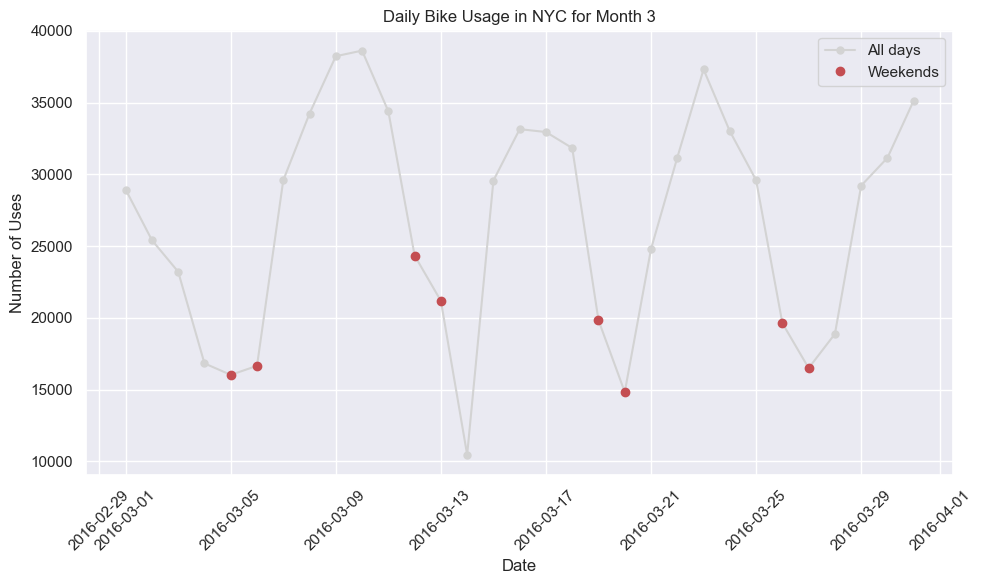

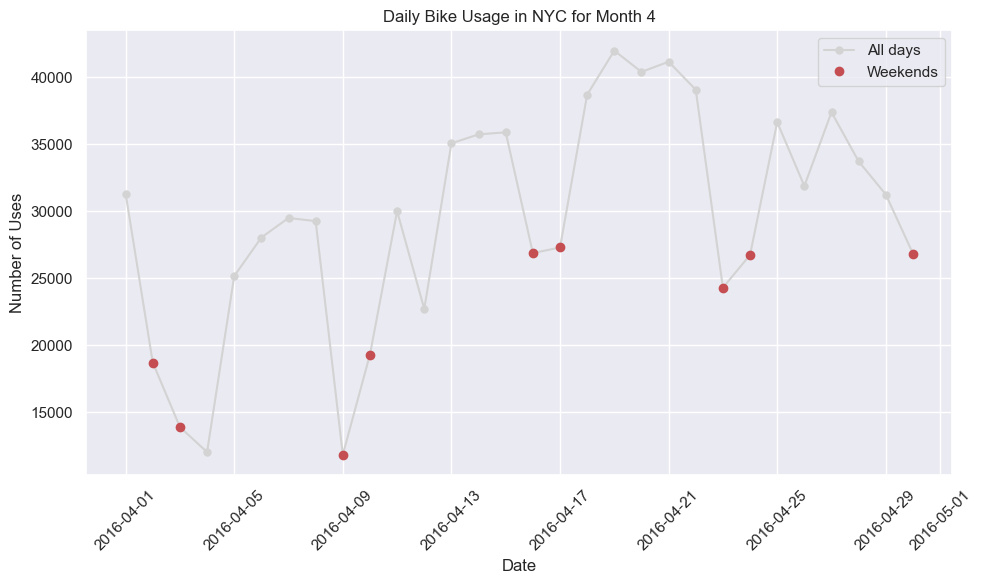

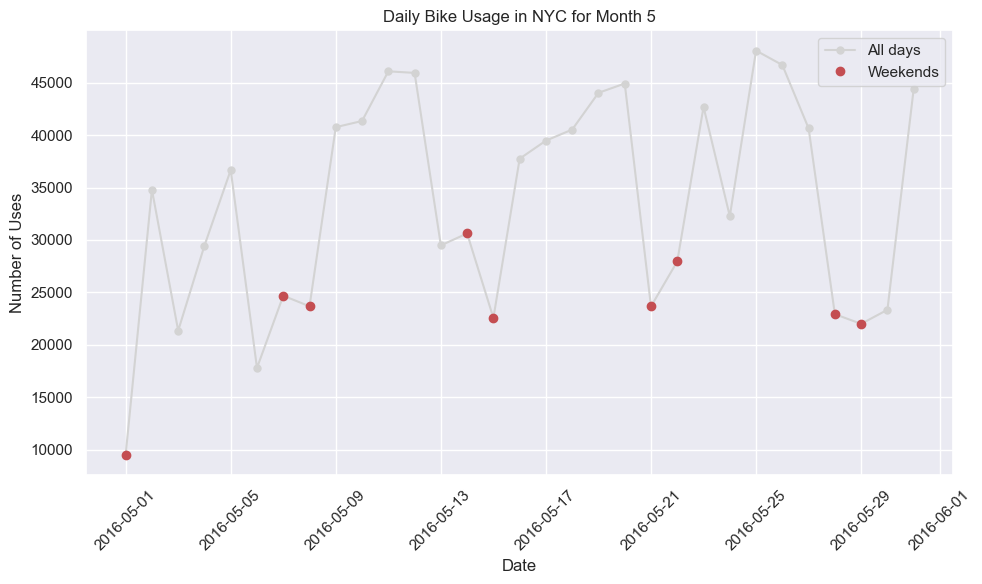

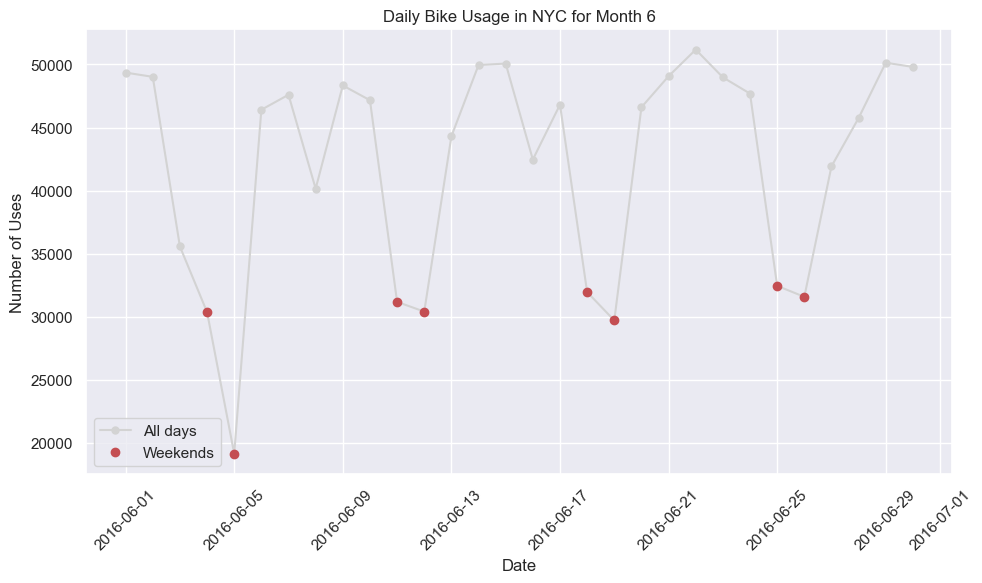

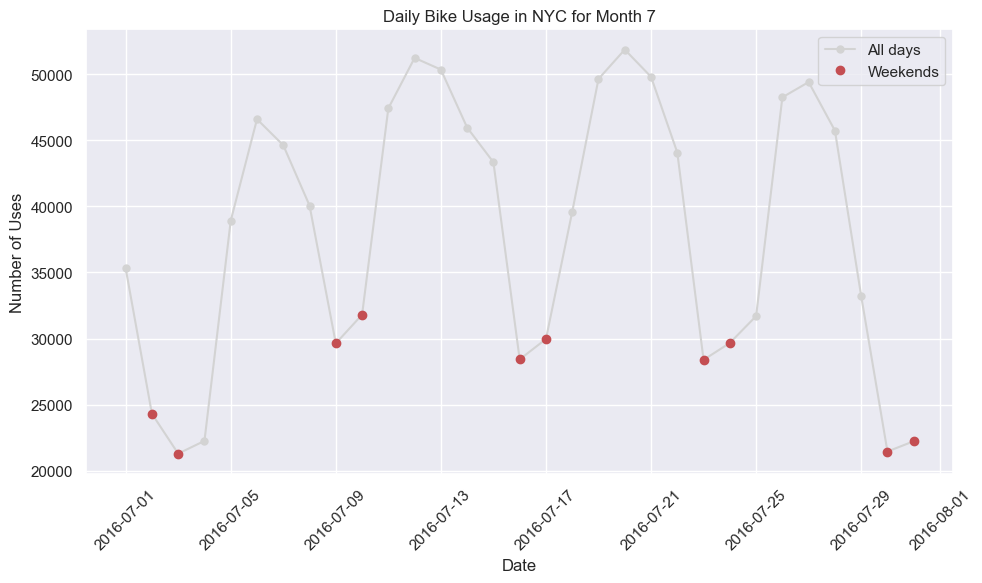

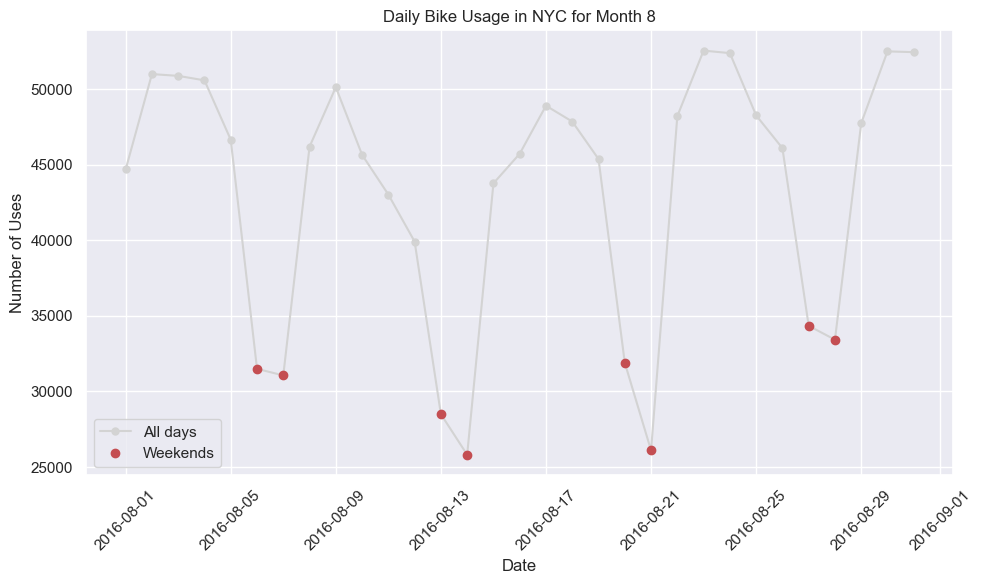

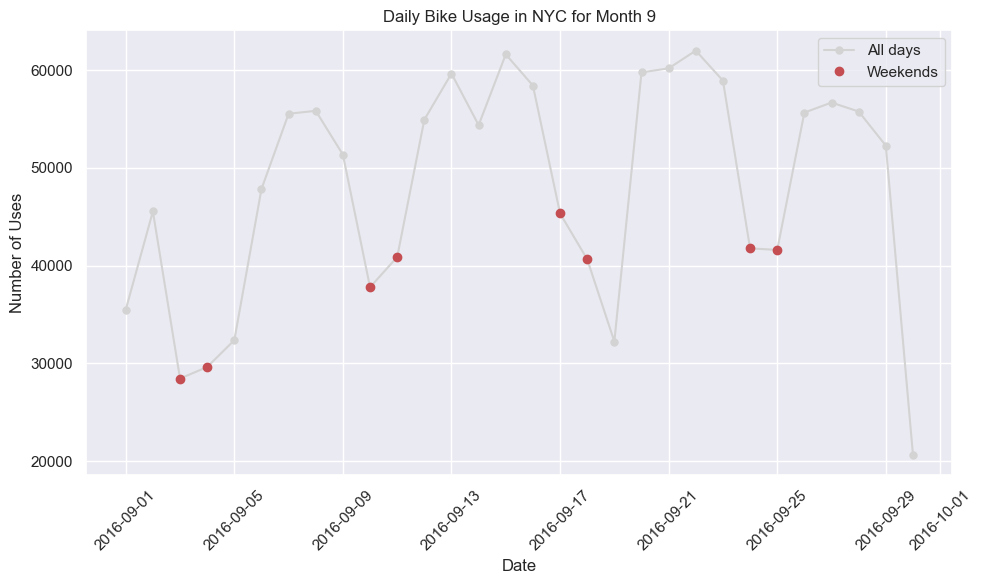

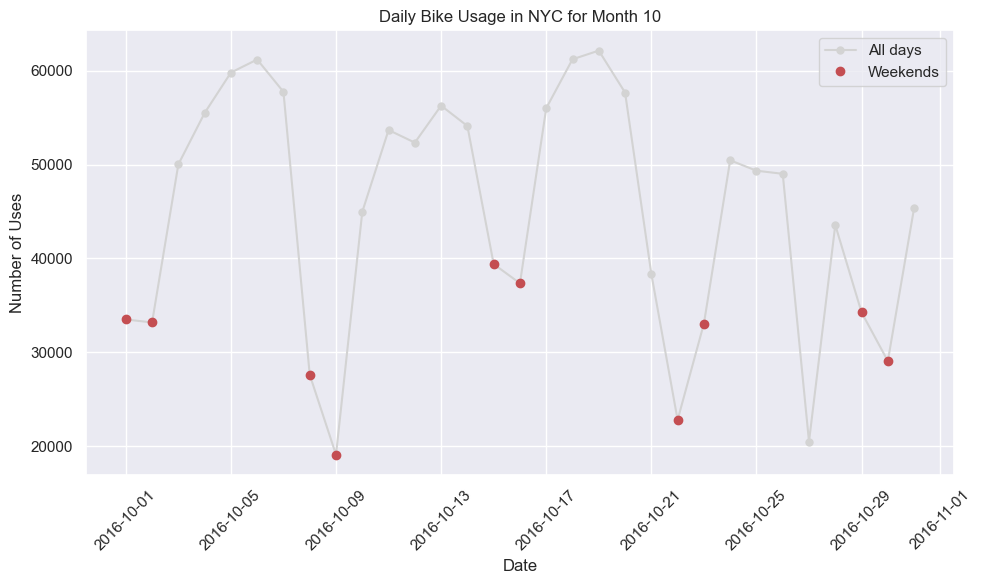

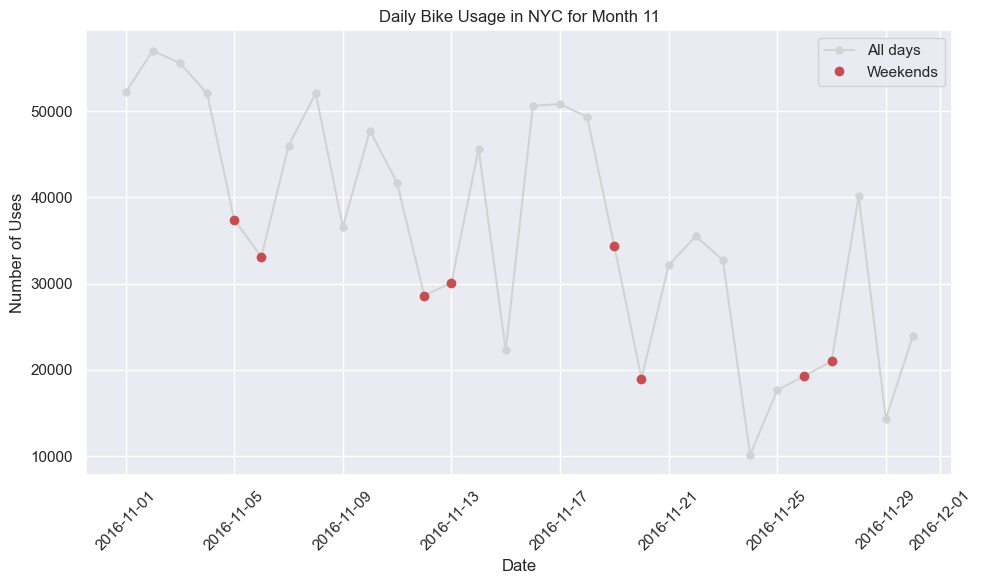

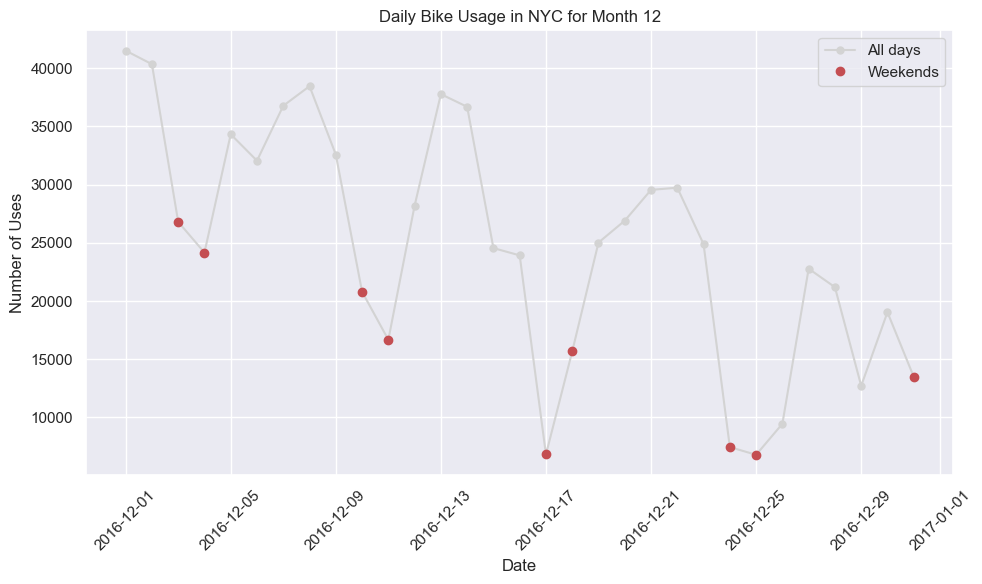

In [31]:
for month in range(1, 13):  # 从1月到12月
    # 筛选出对应月份的数据
    monthly_usage = daily[daily['starttime'].dt.month == month]

    # 确保月份数据非空
    if not monthly_usage.empty:
        plt.figure(figsize=(10, 6))
        
        # 先绘制全部数据的线（统一使用浅灰色，低突出度）
        plt.plot(monthly_usage['starttime'], monthly_usage['usage_count'], 'o-', color='lightgray', markersize=5, label='All days')

        # 再绘制周末的数据（仅绘制红色圆点，不连接线）
        weekend_mask = monthly_usage['start_weekday'] >= 5
        plt.plot(
            monthly_usage[weekend_mask]['starttime'],
            monthly_usage[weekend_mask]['usage_count'],
            'ro',  # 去掉'-'，只绘制点
            markersize=6,
            label='Weekends'
        )

        plt.title(f'Daily Bike Usage in NYC for Month {month}')
        plt.xlabel('Date')
        plt.ylabel('Number of Uses')
        plt.grid(True)
        plt.xticks(rotation=45)  # 旋转日期标签以便阅读
        plt.legend()  # 添加图例
        plt.tight_layout()  # 自动调整子图参数，确保所有标签都在画布内
        plt.show()


### Lost infomation founded:
    we don't have info for jan 23-26

### info we see from the plt
    we can tell at weekend people not using bike that frequent 

# selecting feature we need

In [36]:
selected_features = [
    'starttime','temp', 'feelslike', 'humidity', 
    'snowdepth', 'windspeed', 'visibility',
    'start_month', 'start_quarter', 'start_weekday'
]

df_selected = df[selected_features].copy()


In [40]:
df_selected['date'] = pd.to_datetime(df_selected['starttime']).dt.date

# 过滤出周一的数据（start_weekday == 0）
df_mondays = df_selected[df_selected['start_weekday'] == 0]

# 按日期聚合数据
daily_features = df_mondays.groupby('date').agg({
    'temp': 'mean',
    'feelslike': 'mean',
    'humidity': 'mean',
    'snowdepth': 'mean',
    'windspeed': 'mean',
    'visibility': 'mean',
    'start_month': 'first',
    'start_quarter': 'first'
}).reset_index()

# 将日期转换回datetime格式
daily_features['date'] = pd.to_datetime(daily_features['date'])

# 从'daily'表中提取周一的数据，并确保列名匹配
daily_mondays = daily[daily['start_weekday'] == 0]

# 如果'daily'表的日期列是'starttime'，请确保它与'daily_features'中的'date'列格式一致
daily_mondays['date'] = pd.to_datetime(daily_mondays['starttime']).dt.normalize()

# 合并'daily_features'和'daily_mondays'
merged_data = pd.merge(
    daily_features,
    daily_mondays[['date', 'usage_count']],
    on='date',
    how='inner'
)

# 检查合并后的数据
merged_data.head()

,date,temp,feelslike,humidity,snowdepth,windspeed,visibility,start_month,start_quarter,usage_count
0,2016-01-04,-3.012981,-9.284439,44.940507,0.010453,21.874624,16.000000,1,1,18951
1,2016-01-11,-0.312704,-5.819047,34.681645,0.000000,21.471895,16.000000,1,1,22402
2,2016-01-18,-4.142150,-11.316225,40.050583,0.211838,26.387713,15.846930,1,1,12216
3,2016-02-01,10.692759,9.998552,53.109121,5.907656,10.718470,15.761676,2,1,23617
4,2016-02-08,1.172532,-3.389188,66.017336,2.178511,18.546442,14.409889,2,1,18636


### Draw the heat map


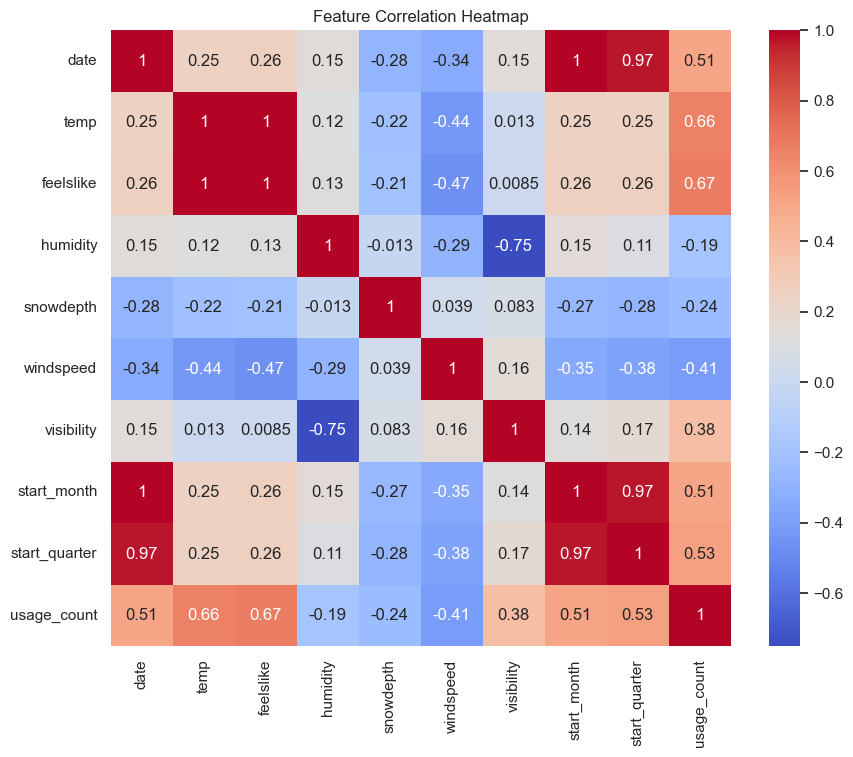

In [41]:
# 计算相关系数矩阵
corr_matrix = merged_data.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# adding date feature & convert

In [42]:
merged_data['days_since_start'] = (merged_data['date'] - merged_data['date'].min()).dt.days

# 可以尝试周期性转换
merged_data['month_sin'] = np.sin(2 * np.pi * merged_data['start_month'] / 12)
merged_data['month_cos'] = np.cos(2 * np.pi * merged_data['start_month'] / 12)

# 更新特征列表
features = [
    'temp', 'feelslike', 'humidity', 'visibility', 
    'days_since_start', 'month_sin', 'month_cos'
]

# 按日期排序
merged_data = merged_data.sort_values('date')

# Split test and valid

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [44]:
train_size = int(len(merged_data) * 0.8)
train_data = merged_data.iloc[:train_size]
test_data = merged_data.iloc[train_size:]

X_train = train_data[features]
y_train = train_data['usage_count']

X_test = test_data[features]
y_test = test_data['usage_count']

# Linear Model

测试集均方误差（MSE）：120926999.2753273


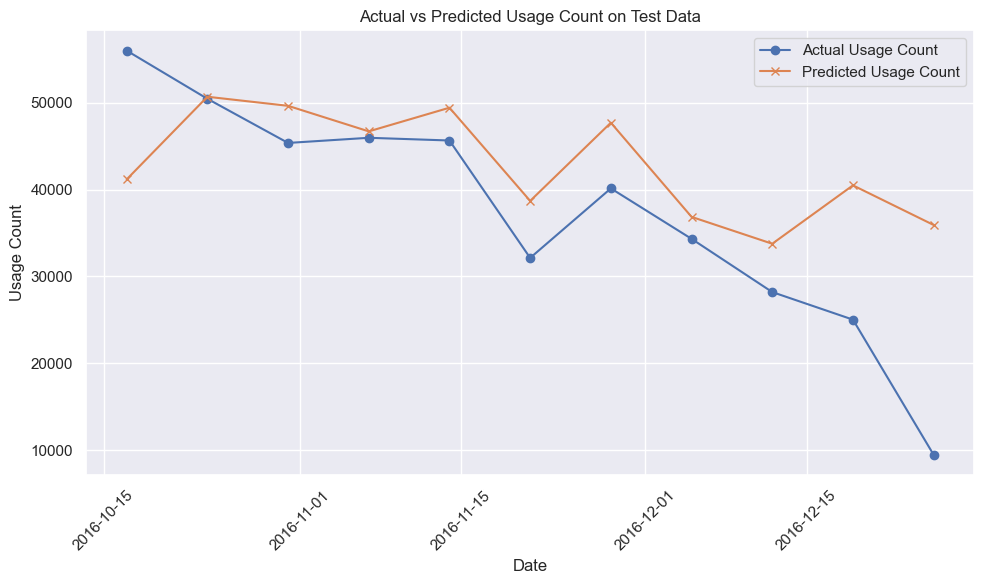

In [45]:
# 创建线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 模型评估
mse = mean_squared_error(y_test, y_pred)
print(f'测试集均方误差（MSE）：{mse}')

# 可视化实际值和预测值
plt.figure(figsize=(10, 6))
plt.plot(test_data['date'], y_test.values, label='Actual Usage Count', marker='o')
plt.plot(test_data['date'], y_pred, label='Predicted Usage Count', marker='x')
plt.xlabel('Date')
plt.ylabel('Usage Count')
plt.title('Actual vs Predicted Usage Count on Test Data')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()